# Titanic - Machine Learning from Disaster
---


** link do desafio Kaggle: https://www.kaggle.com/competitions/titanic

---

O Desafio Titanic do Kaggle é uma competição de aprendizado de máquina onde os participantes devem prever quais passageiros do Titanic sobreviveram ao naufrágio. Utilizando dados históricos reais, como idade, sexo, classe de viagem e outras características, o objetivo é treinar um modelo que faça previsões de sobrevivência. É um projeto popular para iniciantes em ciência de dados, envolvendo técnicas de pré-processamento de dados, engenharia de features e classificação.

---

Definição do Problema e Métrica de Desempenho do Kaggle:

O problema do Desafio Titanic é um problema de classificação binária, onde o objetivo é prever se um passageiro sobreviveu (1) ou não (0) ao naufrágio, com base em características fornecidas, como idade, sexo, classe social, número de irmãos/cônjuges a bordo, entre outras variáveis. O score é calculado em relação ao número de previsões corretas que seu modelo fez. Ou seja, é considerada apenas a acurácia do modelo.

---

Descrição do Data Set:

**Informações do Kaggle**
* Visão geral Os dados foram divididos em dois grupos:
 * Conjunto de Treinamento (train.csv)
 * Conjunto de Teste (test.csv)

 A base de dados de treinamento deve ser usada para construir seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como 'verdade terrestre') para cada passageiro. Seu modelo será baseado em 'características', como o gênero e a classe dos passageiros. Você também pode usar  feature engineering para criar novas features.

 O conjunto de teste deve ser usado para verificar o quão bem o seu modelo se comporta em dados não vistos anteriormente. Para o conjunto de teste, não fornecemos a verdade terrestre para cada passageiro. Cabe a você prever esses resultados. Para cada passageiro no conjunto de teste, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic.

* Descrição dos Dados:

| **Variável** | **Definição**                      | **Chave**                               |
|--------------|------------------------------------|-----------------------------------------|
| survival     | Sobrevivência                      | 0 = Não, 1 = Sim                        |
| pclass       | Classe da passagem                 | 1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe |
| sex          | Sexo                               |                                         |
| Age          | Idade em anos                      |                                         |
| sibsp        | Nº de irmãos / cônjuges a bordo    |                                         |
| parch        | Nº de pais / filhos a bordo        |                                         |
| ticket       | Número da passagem                 |                                         |
| fare         | Tarifa do passageiro               |                                         |
| cabin        | Número da cabine                   |                                         |
| embarked     | Porto de embarque                  | C = Cherbourg, Q = Queenstown, S = Southampton |

* Notas sobre as Variáveis

  * **pclass**: Um proxy para o status socioeconômico (SES)
    * 1ª classe = Alta
    * 2ª classe = Média
    * 3ª classe = Baixa

  * **age (idade)**: A idade é fracionada se for menor que 1. Se a idade for estimada, ela estará no formato xx.5.

  * **sibsp**: O conjunto de dados define as relações familiares desta forma:
    * **Irmão/irmã** = irmão, irmã, meio-irmão, meia-irmã
    * **Cônjuge** = marido, esposa (amantes e noivos foram ignorados)

  * **parch**: O conjunto de dados define as relações familiares desta forma:
    * **Pais** = mãe, pai
    * **Filhos** = filha, filho, enteada, enteado

  Algumas crianças viajaram apenas com uma babá, portanto, **parch = 0** para elas.

fonte: https://www.kaggle.com/competitions/titanic/data

---

In [192]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Compreensão dos Dados

In [194]:
df_train = pd.read_csv('/content/drive/MyDrive/Titanic - Machine Learning from Disaster/train.csv', sep=',')
df_test = pd.read_csv('/content/drive/MyDrive/Titanic - Machine Learning from Disaster/test.csv', sep=',')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [196]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [197]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [198]:
df_train.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [199]:
df_test.nunique()

,0
PassengerId,418
Pclass,3
Name,418
Sex,2
Age,79
SibSp,7
Parch,8
Ticket,363
Fare,169
Cabin,76


In [200]:
(df_train.isnull().sum() / df_train.shape[0]).sort_values(ascending=False)

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000


In [201]:
(df_test.isnull().sum() / df_test.shape[0]).sort_values(ascending=False)

,0
Cabin,0.782297
Age,0.205742
Fare,0.002392
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000


In [202]:
# Analisar a frequência relativa de sobrevivência pelo Sexo
df_train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


<Axes: xlabel='Embarked', ylabel='count'>

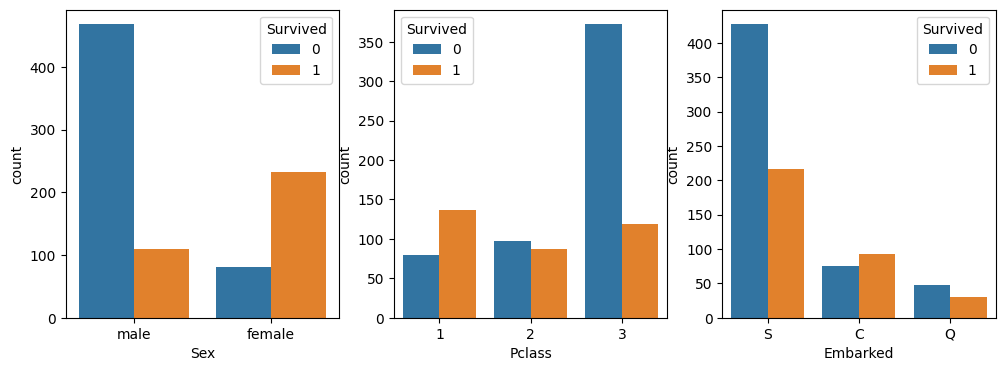

In [203]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(12, 4))

sns.countplot(x='Sex', data=df_train, hue='Survived', ax=axis1)
sns.countplot(x='Pclass', data=df_train, hue='Survived', ax=axis2)
sns.countplot(x='Embarked', data=df_train, hue='Survived', ax=axis3)

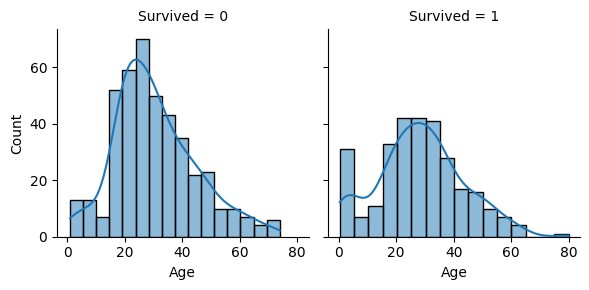

In [204]:
# ver influência da idade na sobrevivência
age_survived = sns.FacetGrid(df_train, col='Survived')
age_survived.map(sns.histplot, 'Age', kde=True)

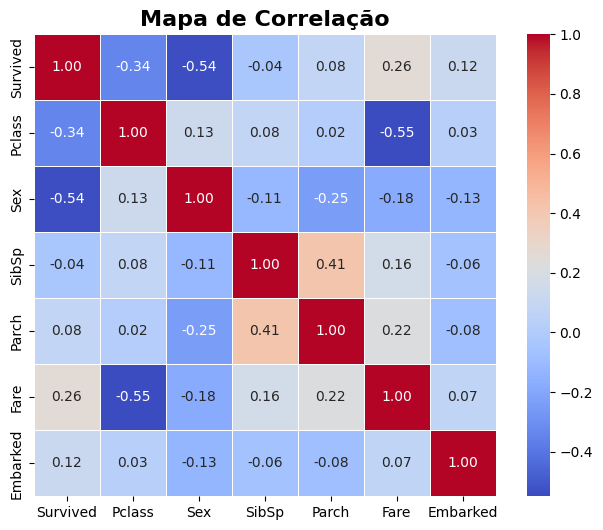

In [205]:
#Mapa de Correlação
df_matriz = df_train.loc[:, ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df_matriz['Sex'] = df_matriz['Sex'].map({'female': 0, 'male':1})
df_matriz['Embarked'] = df_matriz['Embarked'].map({'S': 0, 'C': 1, 'Q':2})
df_matriz.fillna({'Embarked': 3}, inplace=True)

matriz_correlacao = df_matriz.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)
plt.title('Mapa de Correlação', fontsize=16, weight='bold')
plt.show()

## 3. Preparação dos Dados

In [206]:
# Salvar 'Survived' para submissão
passengerId = df_test['PassengerId']

#Extrair a coluna alvo do treino
target = df_train.Survived.copy()
df_train.drop(['Survived'], axis=1, inplace=True)

#Selecionando as Features
df_train.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)
df_test.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)

### Imputação de Dados - Tratamento de Dados Faltantes

In [207]:
# Tratamento de valores nulos com a função de imputação
def imputacao_idade_faltante(data, pontos_embarque = None, pclasses = None, genero = None, ):
  pontos_embarque = data['Embarked'].unique()
  pclasses =  data['Pclass'].unique()
  genero = data['Sex'].unique()

  for sexo in genero:
    for status in pclasses:
      for embarque in pontos_embarque:

        # SibSp != 0 e Parch == 0
        data.loc[(data['Sex'] == sexo) & (data['Embarked'] == embarque) & (data['Pclass'] == status) & (data['SibSp'] != 0) & (data['Parch'] == 0), 'Age'] = data.loc[(data['Sex'] == sexo) & (data['Embarked'] == embarque) & (data['Pclass'] == status) & (data['SibSp'] != 0) & (data['Parch'] == 0), 'Age'].fillna(data['Age'].median())

        # SibSp == 0 e Parch != 0
        data.loc[(data['Sex'] == sexo) & (data['Embarked'] == embarque) & (data['Pclass'] == status) & (data['SibSp'] == 0) & (data['Parch'] != 0), 'Age'] = data.loc[(data['Sex'] == sexo) & (data['Embarked'] == embarque) & (data['Pclass'] == status) & (data['SibSp'] == 0) & (data['Parch'] != 0), 'Age'].fillna(data['Age'].median())

        # SibSp != 0 e Parch != 0
        data.loc[(data['Sex'] == sexo) & (data['Embarked'] == embarque) & (data['Pclass'] == status) & (data['SibSp'] != 0) & (data['Parch'] != 0), 'Age'] = data.loc[(data['Sex'] == sexo) & (data['Embarked'] == embarque) & (data['Pclass'] == status) & (data['SibSp'] != 0) & (data['Parch'] != 0), 'Age'].fillna(data['Age'].median())

        # Caso não possuímos nenhuma dessas informações
        data.loc[(data['Sex'] == sexo) & (data['Embarked'] == embarque) & (data['Pclass'] == status) & (data['SibSp'] == 0) & (data['Parch'] == 0), 'Age'] = data.loc[(data['Sex'] == sexo) & (data['Embarked'] == embarque) & (data['Pclass'] == status) & (data['SibSp'] == 0) & (data['Parch'] == 0), 'Age'].fillna(data['Age'].median())

  return data

#Aplicando a função
df_train = imputacao_idade_faltante(df_train)
df_test = imputacao_idade_faltante(df_test)

#A idade é fracionada se for menor que 1. Se a idade for estimada, estará no formato xx.5. Vamos arredondar esses valores e transformá-los em discretos.
df_train['Age'] = df_train['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)

In [208]:
def imputacao_fare_embarked(data):
  # Calculando a média de 'Fare' por 'Pclass'
  fare_means = data.groupby('Pclass')['Fare'].mean()

  # Preenchendo valores nulos de 'Fare' com a média da respectiva classe
  data['Fare'] = data.apply(lambda row: fare_means[row['Pclass']] if pd.isnull(row['Fare']) else row['Fare'], axis=1)

  # Obtendo o valor mais frequente de 'Embarked'
  embarked_top = data['Embarked'].value_counts().idxmax()

  # Preenchendo os valores nulos com o valor mais frequente
  data.fillna({'Embarked': embarked_top}, inplace=True)

  return data

# Aplicando a função
df_train = imputacao_fare_embarked(df_train)
df_test = imputacao_fare_embarked(df_test)

In [209]:
df_train.isnull().sum()

,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [210]:
df_test.isnull().sum()

,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [211]:
df_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.345679,0.523008,0.381594,32.204208
std,0.836071,13.028212,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [212]:
df_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.574163,0.447368,0.392344,35.571764
std,0.841838,12.721533,0.896760,0.981429,55.851997
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


### Verificação de Candidatos à Outliers


In [213]:
def identificar_outliers(data, coluna):
  quartil_1 = coluna.quantile(0.25)
  quartil_3 = coluna.quantile(0.75)
  distancia_interquartil = quartil_3 - quartil_1
  limite_inferior = quartil_1 - 1.5*(distancia_interquartil)
  limite_superior = quartil_3 + 1.5*(distancia_interquartil)

  possiveis_outliers = data[(coluna < limite_inferior) | (coluna > limite_superior)]

  return possiveis_outliers, limite_inferior, limite_superior

In [214]:
#Identificando Possíveis Outliers no Treino
possiveis_outliers_age, limite_inferior_age, limite_superior_age = identificar_outliers(df_train, df_train['Age'])
media_idade = df_train['Age'].mean()
mediana_idade = df_train['Age'].median()

possiveis_outliers_fare, limite_inferior_fare, limite_superior_fare = identificar_outliers(df_train, df_train['Fare'])
media_fare = df_train['Fare'].mean()
mediana_fare = df_train['Fare'].median()

In [215]:
#Identificando Possíveis Outliers no Test
possiveis_outliers_age_test, limite_inferior_age_test, limite_superior_age_test = identificar_outliers(df_test, df_test['Age'])
media_idade_test = df_test['Age'].mean()
mediana_idade_test = df_test['Age'].median()

possiveis_outliers_fare_test, limite_inferior_fare_test, limite_superior_fare_test = identificar_outliers(df_test, df_test['Fare'])
media_fare_test = df_test['Fare'].mean()
mediana_fare_test = df_test['Fare'].median()

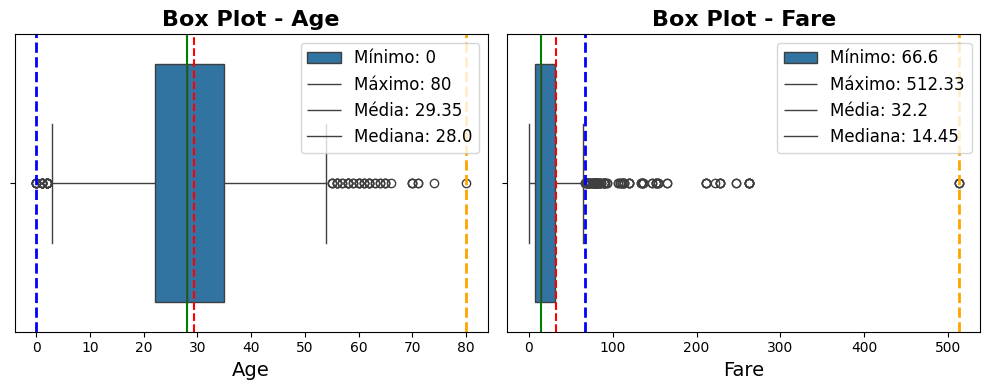

In [216]:
#Plotando seus respectivos Box-Plot's Treino
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 4))

# Box-Plot - Age
sns.boxplot(x=df_train['Age'], ax=axis1)
axis1.axvline(media_idade, color='r', linestyle='--', label='Média')
axis1.axvline(mediana_idade, color='g', linestyle='-', label='Mediana')
axis1.axvline(possiveis_outliers_age['Age'].min(), color='blue', linestyle='--', label='Mínimo', linewidth=2)
axis1.axvline(possiveis_outliers_age['Age'].max(), color='orange', linestyle='--', label='Máximo', linewidth=2)

axis1.set_title('Box Plot - Age', fontsize=16, weight='bold')
axis1.set_xlabel('Age', fontsize=14)
axis1.legend(
    [
        f'Mínimo: {possiveis_outliers_age["Age"].min()}',
        f'Máximo: {possiveis_outliers_age["Age"].max()}',
        f'Média: {round(media_idade, 2)}',
        f'Mediana: {mediana_idade}'
    ],
    loc='upper right',
    fontsize=12
)

# Box-Plot - Fare
sns.boxplot(x=df_train['Fare'], ax=axis2)
axis2.axvline(media_fare, color='r', linestyle='--', label='Média')
axis2.axvline(mediana_fare, color='g', linestyle='-', label='Mediana')
axis2.axvline(possiveis_outliers_fare['Fare'].min(), color='blue', linestyle='--', label='Mínimo', linewidth=2)
axis2.axvline(possiveis_outliers_fare['Fare'].max(), color='orange', linestyle='--', label='Máximo', linewidth=2)

axis2.set_title('Box Plot - Fare', fontsize=16, weight='bold')
axis2.set_xlabel('Fare', fontsize=14)
axis2.legend(
    [
        f'Mínimo: {round(possiveis_outliers_fare["Fare"].min(), 2)}',
        f'Máximo: {round(possiveis_outliers_fare["Fare"].max(), 2)}',
        f'Média: {round(media_fare, 2)}',
        f'Mediana: {round(mediana_fare, 2)}'
    ],
    loc='upper right',
    fontsize=12
)

plt.tight_layout()
plt.show()

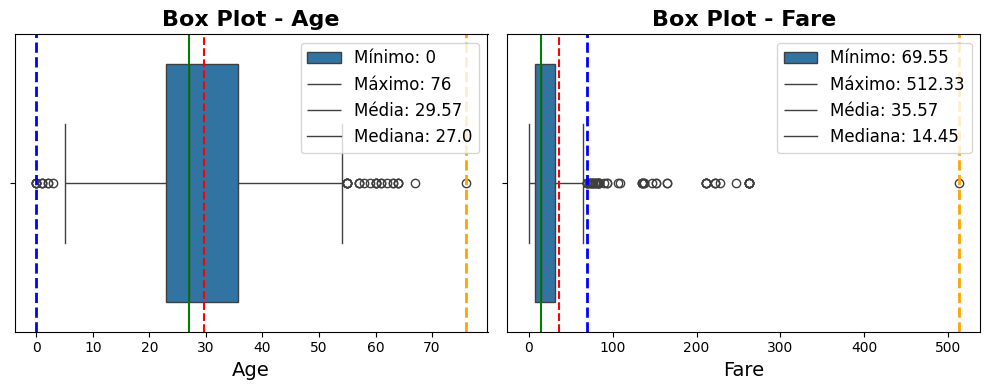

In [217]:
#Plotando seus respectivos Box-Plot's Test
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 4))

# Box-Plot - Age
sns.boxplot(x=df_test['Age'], ax=axis1)
axis1.axvline(media_idade_test, color='r', linestyle='--', label='Média')
axis1.axvline(mediana_idade_test, color='g', linestyle='-', label='Mediana')
axis1.axvline(possiveis_outliers_age_test['Age'].min(), color='blue', linestyle='--', label='Mínimo', linewidth=2)
axis1.axvline(possiveis_outliers_age_test['Age'].max(), color='orange', linestyle='--', label='Máximo', linewidth=2)

axis1.set_title('Box Plot - Age', fontsize=16, weight='bold')
axis1.set_xlabel('Age', fontsize=14)
axis1.legend(
    [
        f'Mínimo: {possiveis_outliers_age_test["Age"].min()}',
        f'Máximo: {possiveis_outliers_age_test["Age"].max()}',
        f'Média: {round(media_idade_test, 2)}',
        f'Mediana: {mediana_idade_test}'
    ],
    loc='upper right',
    fontsize=12
)

# Box-Plot - Fare
sns.boxplot(x=df_test['Fare'], ax=axis2)
axis2.axvline(media_fare_test, color='r', linestyle='--', label='Média')
axis2.axvline(mediana_fare_test, color='g', linestyle='-', label='Mediana')
axis2.axvline(possiveis_outliers_fare_test['Fare'].min(), color='blue', linestyle='--', label='Mínimo', linewidth=2)
axis2.axvline(possiveis_outliers_fare_test['Fare'].max(), color='orange', linestyle='--', label='Máximo', linewidth=2)

axis2.set_title('Box Plot - Fare', fontsize=16, weight='bold')
axis2.set_xlabel('Fare', fontsize=14)
axis2.legend(
    [
        f'Mínimo: {round(possiveis_outliers_fare_test["Fare"].min(), 2)}',
        f'Máximo: {round(possiveis_outliers_fare_test["Fare"].max(), 2)}',
        f'Média: {round(media_fare_test, 2)}',
        f'Mediana: {round(mediana_fare_test, 2)}'
    ],
    loc='upper right',
    fontsize=12
)

plt.tight_layout()
plt.show()

## 4. Feature Engineering

---

Inicialmente, é fundamental considerar fatores relevantes como idade e sexo, além de outras informações que podem ajudar a identificar quem tem maior probabilidade de sobrevivência no contexto do Titanic. A quantidade de crianças e mulheres em uma família influencia na taxa de sobrevivência?

In [218]:
#Classificação por Idade - Nova Feature
def classificacao_idade(data, coluna):
  classificacao_por_idade = []
  for i in coluna:
    if i <= 1:
      classificacao_por_idade.append('newborn')
    elif i <= 5:
      classificacao_por_idade.append('pre-child')
    elif i <= 12:
      classificacao_por_idade.append('child')
    elif i <= 18:
      classificacao_por_idade.append('teen')
    elif i < 45:
      classificacao_por_idade.append('adult')
    else:
      classificacao_por_idade.append('elderly')

  data['AgeClassification'] = classificacao_por_idade
  return data

#Aplicando Nova Feature
classificacao_idade(df_train, df_train['Age'])
classificacao_idade(df_test, df_test['Age'])

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeClassification
0,3,"Kelly, Mr. James",male,34,0,0,7.8292,Q,adult
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,7.0000,S,elderly
2,2,"Myles, Mr. Thomas Francis",male,62,0,0,9.6875,Q,elderly
3,3,"Wirz, Mr. Albert",male,27,0,0,8.6625,S,adult
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,12.2875,S,adult
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27,0,0,8.0500,S,adult
414,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,108.9000,C,adult
415,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,7.2500,S,adult
416,3,"Ware, Mr. Frederick",male,27,0,0,8.0500,S,adult


In [219]:
#Extração e Criação da Coluna Familia para identificação da Quantidade de crianças que a mesma possuí
def familia(data):
  familia = []
  for nome in data['Name']:
    sobrenome = nome.split(',')[0].capitalize()
    familia.append(sobrenome)

  data['Family'] = familia
  return data

#Contagem de Crianças por Familia Pelo Sobrenome
def criancas_por_familia(data):
  quantidade_criancas = []
  familias = data['Family'].unique()

  for sobrenome in familias:
    quantidade = data.loc[(data['Family'] == sobrenome) & (data['Age'] <= 12)].Family.map(lambda x: sobrenome in x).sum()
    quantidade_criancas.append(quantidade)

  data['ChildrenPerFamily'] = [quantidade_criancas[familias.tolist().index(fam)] for fam in data['Family']]
  return data

#Aplicando
familia(df_train)
criancas_por_familia(df_train)

familia(df_test)
criancas_por_familia(df_test)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeClassification,Family,ChildrenPerFamily
0,3,"Kelly, Mr. James",male,34,0,0,7.8292,Q,adult,Kelly,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,7.0000,S,elderly,Wilkes,0
2,2,"Myles, Mr. Thomas Francis",male,62,0,0,9.6875,Q,elderly,Myles,0
3,3,"Wirz, Mr. Albert",male,27,0,0,8.6625,S,adult,Wirz,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,12.2875,S,adult,Hirvonen,0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27,0,0,8.0500,S,adult,Spector,0
414,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,108.9000,C,adult,Oliva y ocana,0
415,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,7.2500,S,adult,Saether,0
416,3,"Ware, Mr. Frederick",male,27,0,0,8.0500,S,adult,Ware,0


In [220]:
#Contagem de Mulheres por Familia Pelo Sobrenome
def mulheres_por_familia(data):
  quantidade_mulheres = []
  familias = data['Family'].unique()

  for sobrenome in familias:
    quantidade = data.loc[(data['Family'] == sobrenome) & (data['Sex'] == 'female')].Family.map(lambda x: sobrenome in x).sum()
    quantidade_mulheres.append(quantidade)

  data['WomanPerFamily'] = [quantidade_mulheres[familias.tolist().index(fam)] for fam in data['Family']]
  return data

#Aplicando
mulheres_por_familia(df_train)
mulheres_por_familia(df_test)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeClassification,Family,ChildrenPerFamily,WomanPerFamily
0,3,"Kelly, Mr. James",male,34,0,0,7.8292,Q,adult,Kelly,0,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,7.0000,S,elderly,Wilkes,0,1
2,2,"Myles, Mr. Thomas Francis",male,62,0,0,9.6875,Q,elderly,Myles,0,0
3,3,"Wirz, Mr. Albert",male,27,0,0,8.6625,S,adult,Wirz,0,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,12.2875,S,adult,Hirvonen,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27,0,0,8.0500,S,adult,Spector,0,0
414,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,108.9000,C,adult,Oliva y ocana,0,1
415,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,7.2500,S,adult,Saether,0,0
416,3,"Ware, Mr. Frederick",male,27,0,0,8.0500,S,adult,Ware,0,1


In [221]:
df_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeClassification,Family,ChildrenPerFamily,WomanPerFamily
0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,adult,Braund,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,adult,Cumings,0,1
2,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,adult,Heikkinen,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,adult,Futrelle,0,1
4,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,adult,Allen,0,1


In [222]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeClassification,Family,ChildrenPerFamily,WomanPerFamily
0,3,"Kelly, Mr. James",male,34,0,0,7.8292,Q,adult,Kelly,0,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,7.0000,S,elderly,Wilkes,0,1
2,2,"Myles, Mr. Thomas Francis",male,62,0,0,9.6875,Q,elderly,Myles,0,0
3,3,"Wirz, Mr. Albert",male,27,0,0,8.6625,S,adult,Wirz,0,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,12.2875,S,adult,Hirvonen,0,1


In [223]:
#Selecionando colunas
df_train.drop(['Name', 'Family'], axis=1, inplace=True)
df_test.drop(['Name', 'Family'], axis=1, inplace=True)

### Tranformação de Variáveis Categóricas em Dummies

In [224]:
df_train =  pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'AgeClassification'], drop_first=True)
df_test =  pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'AgeClassification'], drop_first=True)

In [225]:
df_train.head()

,Pclass,Age,SibSp,Parch,Fare,ChildrenPerFamily,WomanPerFamily,Sex_male,Embarked_Q,Embarked_S,AgeClassification_child,AgeClassification_elderly,AgeClassification_newborn,AgeClassification_pre-child,AgeClassification_teen
0,3,22,1,0,7.2500,0,0,True,False,True,False,False,False,False,False
1,1,38,1,0,71.2833,0,1,False,False,False,False,False,False,False,False
2,3,26,0,0,7.9250,0,1,False,False,True,False,False,False,False,False
3,1,35,1,0,53.1000,0,1,False,False,True,False,False,False,False,False
4,3,35,0,0,8.0500,0,1,True,False,True,False,False,False,False,False


In [226]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,ChildrenPerFamily,WomanPerFamily,Sex_male,Embarked_Q,Embarked_S,AgeClassification_child,AgeClassification_elderly,AgeClassification_newborn,AgeClassification_pre-child,AgeClassification_teen
0,3,34,0,0,7.8292,0,0,True,True,False,False,False,False,False,False
1,3,47,1,0,7.0000,0,1,False,False,True,False,True,False,False,False
2,2,62,0,0,9.6875,0,0,True,True,False,False,True,False,False,False
3,3,27,0,0,8.6625,0,0,True,False,True,False,False,False,False,False
4,3,22,1,1,12.2875,0,1,False,False,True,False,False,False,False,False


## 5. Construção e Avaliação do Modelo

In [227]:
#Separando dados entre traino 70% e validação 30%
from sklearn.model_selection import train_test_split

#y == 'Survived'
X = df_train
y = target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [228]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [239]:
# Modelo: Gradient Boosting
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_train_pred_gb = gb_clf.predict(X_train)
y_val_pred_gb = gb_clf.predict(X_val)
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
val_accuracy_gb = accuracy_score(y_val, y_val_pred_gb)

# Exibir os resultados de acurácia
print(f"Gradient Boosting Train Accuracy: {round(train_accuracy_gb,4)}")
print(f"Gradient Boosting Validation Accuracy: {round(val_accuracy_gb,4)}")

Gradient Boosting Train Accuracy: 0.9053
Gradient Boosting Validation Accuracy: 0.8097


In [230]:
# Definir os hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Inicializar o modelo
gb_clf = GradientBoostingClassifier()

# Configurar a busca em grade
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Treinar o modelo com a busca em grade
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Avaliar o desempenho do modelo com os melhores hiperparâmetros
best_gb_clf = grid_search.best_estimator_
y_val_pred_best_gb = best_gb_clf.predict(X_val)
val_accuracy_best_gb = accuracy_score(y_val, y_val_pred_best_gb)

print(f"Gradient Boosting Validation Accuracy (com hiperparâmetros ajustados): {round(val_accuracy_best_gb, 4)}")

Melhores hiperparâmetros: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Gradient Boosting Validation Accuracy (com hiperparâmetros ajustados): 0.8172


### Avaliação do Modelo

---

In [231]:
from sklearn.metrics import confusion_matrix

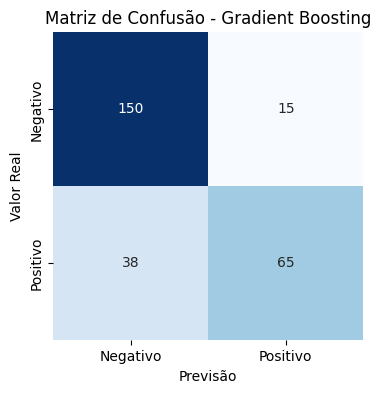

In [232]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_val, y_val_pred_gb)

# Criar uma visualização usando heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão - Gradient Boosting")
plt.show()

* Verdadeiros Negativos (152): O modelo acertou ao prever que a pessoa não sobreviveu.
*  Falsos Positivos (13): O modelo previu que a pessoa sobreviveu, mas ela não sobreviveu (um erro de previsão).
* Falsos Negativos (38): O modelo previu que a pessoa não sobreviveu, mas ela sobreviveu (outro erro).
* Verdadeiros Positivos (65): O modelo acertou ao prever que a pessoa sobreviveu.

---

* Altos valores nos verdadeiros positivos e negativos indicam que o modelo está fazendo previsões corretas com mais frequência.
* Altos valores nos falsos positivos ou falsos negativos sugerem que o modelo está errando na previsão de uma ou outra classe, o que pode indicar necessidade de ajuste de hiperparâmetros ou melhorar o balanceamento das classes no dataset.


In [233]:
from sklearn.model_selection import learning_curve

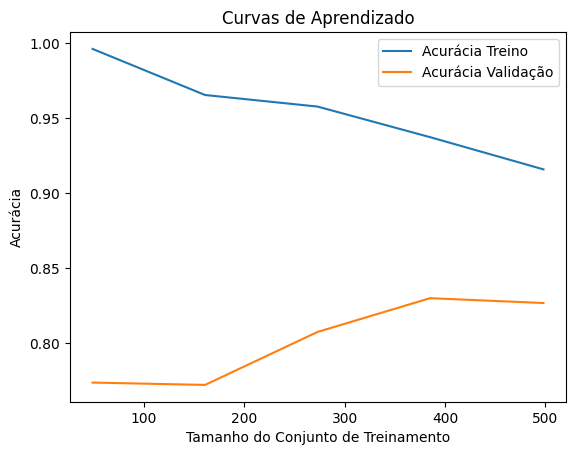

In [234]:
# Gerar as curvas de aprendizado
train_sizes, train_scores, val_scores = learning_curve(gb_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calcular as médias e os desvios padrão
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

# Plotar as curvas de aprendizado
plt.plot(train_sizes, train_scores_mean, label='Acurácia Treino')
plt.plot(train_sizes, val_scores_mean, label='Acurácia Validação')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.show()

* Sinais de overfitting: A acurácia de treino é bastante alta e continua superior à acurácia de validação, o que sugere que o modelo pode estar "memorizando" o treino.
* Melhorias na generalização: A curva de validação sobe à medida que mais dados são usados, indicando que o modelo está aprendendo a generalizar, mas ainda há espaço para otimizações.

In [235]:
from sklearn.model_selection import cross_val_score

In [242]:
# Realizar validação cruzada (cv=5 significa 5 divisões)
cv_scores = cross_val_score(gb_clf, X_train, y_train, cv=5, scoring='accuracy')

# Exibir os resultados
print(f"Validação Cruzada - Acurácia Média: {cv_scores.mean():.4f}")
print(f"Validação Cruzada - Desvio Padrão: {cv_scores.std():.4f}")

Validação Cruzada - Acurácia Média: 0.8282
Validação Cruzada - Desvio Padrão: 0.0113


## 7. Submissão P/Kaggle

In [243]:
# Fazer previsões no conjunto de teste
y_test_pred_gb = gb_clf.predict(df_test)

# Criar o DataFrame de submissão
submission_gb = pd.DataFrame({'PassengerId': passengerId, 'Survived': y_test_pred_gb})

# Exportar para CSV
submission_gb.to_csv('/content/drive/MyDrive/Titanic - Machine Learning from Disaster/submission_gb.csv', index=False)